# Deep Learning: More Convolutional Neural Networks

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

For today's small group, we will walk through the process of setting up a convolutional neural network ("CNN" for short) using the `tensorflow` package! This exercise leverages code from the `tensorflow` [example](https://www.tensorflow.org/tutorials/images/cnn) in the documentation.

Recall from lecture that CNNs are generally used to process gridded data or images.

Let's begin by loading one of the toy datasets included in `tensorflow.datasets`:

In [4]:
# load train and test images
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Great! We have image data now. But what does it look like?

Let's plot the different classes below using `matplotlib`

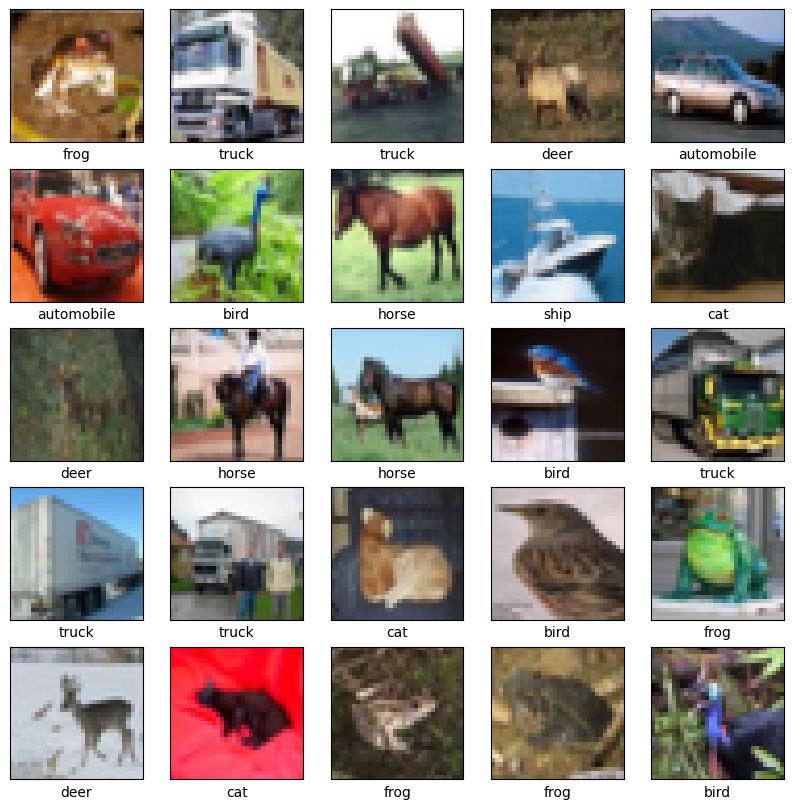

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The CIFAR labels happen to be arrays, so flatten them for indexing purposes
train_label_list = train_labels.ravel()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    plt.xlabel(class_names[train_label_list[i]])
plt.show()

## Building a CNN

Staff:
- Reference lecture: CNNs involve stacking multiple **layers**
- The first part of a CNN involves stacking multiple layers of convolutional, activation, and maxpool layers 
- The example code below shows 3 of these stacks of layers!
<p align="left">
    <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20250529121802516451/Convolutional-Neural-Network-in-Machine-Learning.webp" width = "500">
</p>

### Activation Functions

Staff:
- Please briefly review some of the common activation functions (there will be a table on this at the beginning of lecture)
- Discuss 3 of the most common activation functions
- Be sure to define what their names are in tensorflow

In [6]:
activation_func = 'relu'
model = Sequential()
model.add(Input(shape=(32, 32, 3)))

# add convolutional, activation, and maxpool layers
model.add(Conv2D(32, (3, 3), activation=activation_func))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation=activation_func))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation=activation_func))

# add fully connected dense layers
model.add(Flatten())
model.add(Dense(64, activation=activation_func))
model.add(Dense(10))
model.summary()

2025-11-18 23:46:48.970518: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-11-18 23:46:48.970539: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-11-18 23:46:48.970543: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-11-18 23:46:48.970560: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-18 23:46:48.970569: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Q: What do you think will happen to your CNN as you change the activation function?
Feel free to try this by changing `activation_func`!

### A: 
YOUR ANSWER HERE

----
## Training a CNN
Staff:
- Please discuss the selection process for optimizer and loss inputs
- Define what learning rate is
- Give an overview of 2-3 common loss functions and their behavior

[This](https://www.geeksforgeeks.org/machine-learning/epoch-in-machine-learning/) reference will be useful

In [10]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We will also add some guardrails so that our model exits the training process early if it isn't learning anything:

In [ ]:
# force the model to exit training if monitored metric doesn't improve
early_stop = EarlyStopping(
    monitor='val_accuracy',    # metric to monitor
    patience=2,                # number of epochs with no improvement before stopping
    restore_best_weights=True  # restores model weights from the epoch with the best value of the monitored metric
)

### Q: What might happen if we changed our loss from __ to __ ?

### A:
YOUR ANSWER HERE

### Q: What happens if the `learning_rate` parameter is too high? Or too low?

### A:
YOUR ANSWER HERE

----
- Staff: Please define what `epochs` means


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stop])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5148 - loss: 2.0049

### Q: What happens if you increase `epochs`? Will performance always improve as `epochs` increases?

### A:
YOUR ANSWER HERE

----

## Analyzing Performance
- Staff: prompt some reflection about the plot below

313/313 - 1s - 4ms/step - accuracy: 0.5616 - loss: 1.3426


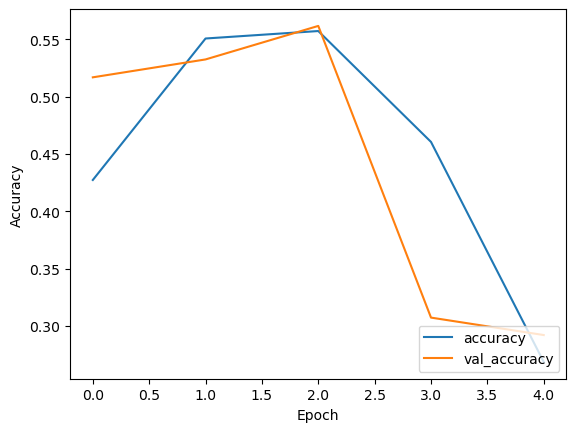

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)